In [2]:
from scipy import stats
import itertools
import math
import pandas as pd
import numpy as np
from scipy.stats import studentized_range

In [5]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/8086/states.csv')

In [6]:
df

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6
5,Colorado,84.5,90.2,88.7,9.4,9.6
6,Connecticut,87.7,85.4,87.5,7.8,12.1
7,Delaware,80.1,76.3,88.7,8.1,13.1
8,District of Columbia,100.0,36.2,86.0,16.8,18.9
9,Florida,89.3,80.6,84.7,12.1,12.0


<AxesSubplot:xlabel='hs_grad', ylabel='poverty'>

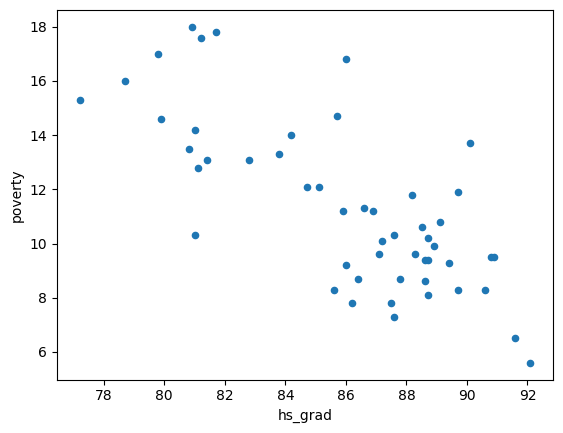

In [12]:
df.plot.scatter(x='hs_grad', y='poverty')

In [40]:
import numpy as np
from sklearn.linear_model import LinearRegression
# y = 1 * x_0 + 2 * x_1 + 3
l = len(df.values)
X = df.hs_grad.to_numpy().reshape(l,1)
y = df.poverty.to_numpy().reshape(l,1)
reg = LinearRegression().fit(X, y)
reg.score(X, y)

# reg.coef_
#
# reg.intercept_
#
# reg.predict(np.array([[3, 5]]))

0.5577972503105937

In [47]:
reg = LinearRegression().fit(X, y)

In [52]:
reg.t

array([[23.06894425]])

In [38]:
print(reg.coef_)

print(reg.intercept_)



[[-0.62121672]]
[64.78096577]


In [46]:
from sklearn import linear_model
from scipy import stats
import numpy as np


class LinearRegression(linear_model.LinearRegression):
    """
    LinearRegression class after sklearn's, but calculate t-statistics
    and p-values for model coefficients (betas).
    Additional attributes available after .fit()
    are `t` and `p` which are of the shape (y.shape[1], X.shape[1])
    which is (n_features, n_coefs)
    This class sets the intercept to 0 by default, since usually we include it
    in X.
    """

    def __init__(self, *args, **kwargs):
        if not "fit_intercept" in kwargs:
            kwargs['fit_intercept'] = False
        super(LinearRegression, self) \
            .__init__(*args, **kwargs)

    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)

        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([
            np.sqrt(np.diagonal(sse[i] * np.linalg.inv(np.dot(X.T, X))))
            for i in range(sse.shape[0])
        ])

        self.t = self.coef_ / se
        self.p = 2 * (1 - stats.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1]))
        return self

In [53]:
import statsmodels.api as sm

In [54]:
x = sm.add_constant(X)

In [55]:
model = sm.OLS(y, x).fit()

In [56]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     61.81
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           3.11e-10
Time:                        18:56:55   Log-Likelihood:                -108.74
No. Observations:                  51   AIC:                             221.5
Df Residuals:                      49   BIC:                             225.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.7810      6.803      9.523      0.0